<a href="https://colab.research.google.com/github/Lagstill/COA_Package/blob/main/under_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.io import loadmat
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
import torch as th
import numpy as np
from torchvision import datasets, transforms
import torchvision.datasets as datasets
from torch.utils.data import Subset
from torch import nn
import torch.nn.functional as F
from torch import optim
import syft as sy


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range (0,10):
    print(i,"=====>",class_names[i])

0 =====> T-shirt/top
1 =====> Trouser
2 =====> Pullover
3 =====> Dress
4 =====> Coat
5 =====> Sandal
6 =====> Shirt
7 =====> Sneaker
8 =====> Bag
9 =====> Ankle boot


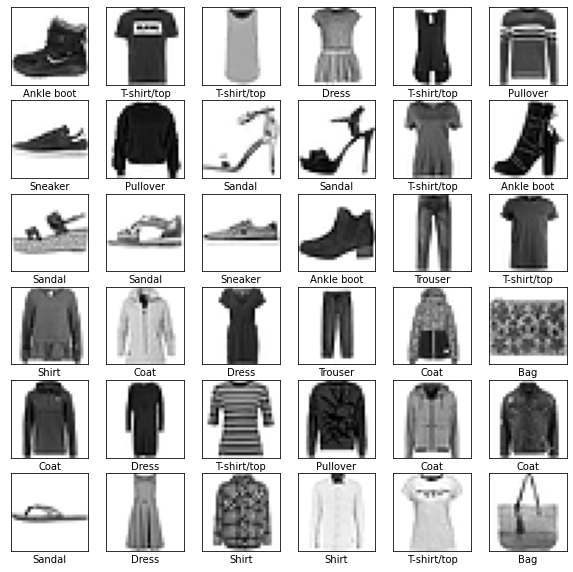

In [7]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
train1 = train_images[:200]

In [10]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
label1=train_labels[:200]

In [12]:
df = pd.DataFrame(train_labels)
df=df.rename(columns={0: "label"})

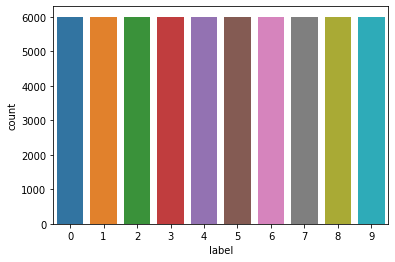

In [13]:
ax = sns.countplot(x="label", data=df)

In [14]:
y_value=np.zeros((1,10))
for i in range (10):
    print("occurance of ",i,"=",np.count_nonzero(train_labels==i))
    y_value[0,i-1]= np.count_nonzero(train_labels==i)

occurance of  0 = 6000
occurance of  1 = 6000
occurance of  2 = 6000
occurance of  3 = 6000
occurance of  4 = 6000
occurance of  5 = 6000
occurance of  6 = 6000
occurance of  7 = 6000
occurance of  8 = 6000
occurance of  9 = 6000


In [15]:
def normalize(data):
    mean = np.mean(data, axis=1, keepdims=True)
    std = np.std(data, axis=1, keepdims=True)
    data_normalized = (data - mean)/std
    return data_normalized

In [16]:
mnist_data_normalized = normalize(train_images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [17]:
train1 =train1.reshape(-1, 28**2)

In [18]:
label1 = label1.astype('float64')

In [19]:
train1 = train1.astype('float64')

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(train1,label1, test_size=0.20, random_state=42)
Y_train = Y_train.reshape(Y_train.shape[0],1)
Y_test = Y_test.reshape(Y_test.shape[0],1)
print("The shape of the training set feature matrix is:", X_train.shape)
print("The shape of the training label vector is:", Y_train.shape)
print("The shape of the test set feature matrix is:", X_test.shape)
print("The shape of the test label vector is:", Y_test.shape)

The shape of the training set feature matrix is: (160, 784)
The shape of the training label vector is: (160, 1)
The shape of the test set feature matrix is: (40, 784)
The shape of the test label vector is: (40, 1)


In [21]:
Y_train_0=(Y_train==0).astype(int)
Y_train_1=(Y_train==1).astype(int)
Y_train_2=(Y_train==2).astype(int)
Y_train_3=(Y_train==3).astype(int)
Y_train_4=(Y_train==4).astype(int)
Y_train_5=(Y_train==5).astype(int)
Y_train_6=(Y_train==6).astype(int)
Y_train_7=(Y_train==7).astype(int)
Y_train_8=(Y_train==8).astype(int)
Y_train_9=(Y_train==9).astype(int)

In [22]:
Y_test_0=(Y_test==0).astype(int)
Y_test_1=(Y_test==1).astype(int)
Y_test_2=(Y_test==2).astype(int)
Y_test_3=(Y_test==3).astype(int)
Y_test_4=(Y_test==4).astype(int)
Y_test_5=(Y_test==5).astype(int)
Y_test_6=(Y_test==6).astype(int)
Y_test_7=(Y_test==7).astype(int)
Y_test_8=(Y_test==8).astype(int)
Y_test_9=(Y_test==9).astype(int)


In [23]:
def initializer(nbr_features):
    W = np.zeros((nbr_features,1))
    B = 0
    return W, B

In [24]:
# Creating a Sigmoid function

def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s


In [25]:
def ForwardBackProp(X, Y, W, B):
    m = X.shape[0] 
    dw = np.zeros((W.shape[0],1))
    dB = 0
    
    Z = np.dot(X,W)+B
    Yhat = sigmoid(Z) 
    J = -(1/m+1)*(np.dot(Y.T,np.log(Yhat))+np.dot((1-Y).T,np.log(1-Yhat)))
    dW = (1/m)*np.dot(X.T,(Yhat-Y))
    dB = (1/m)*np.sum(Yhat-Y)
    return J, dW, dB


In [26]:
# Creating a prediction function which predicts the labels of the input images

def predict(X,W,B):
    Yhat_prob = sigmoid(np.dot(X,W)+B)
    Yhat = np.round(Yhat_prob).astype(int)
    return Yhat, Yhat_prob

In [27]:
def gradient_descent(X, Y, W, B, alpha, max_iter):
    i=0
    RMSE = 1
    cost_history=[]
    
    # setup toolbar
    toolbar_width = 20
    sys.stdout.write("[%s]" % ("" * toolbar_width))
    sys.stdout.flush()
    sys.stdout.write("\b" * (toolbar_width+1)) # return to start of line, after '['
    
    while (i<max_iter)&(RMSE>10e-6):
        J, dW, dB = ForwardBackProp(X,Y,W,B)
        W = W - alpha*dW
        B = B - alpha*dB
        cost_history.append(J)
        Yhat, _ = predict(X,W,B)
        RMSE = np.sqrt(np.mean(Yhat-Y)**2)
        i+=1
        if i%50==0:
            sys.stdout.write("=")
            sys.stdout.flush()
    
    sys.stdout.write("]\n") # this ends the progress bar
    return cost_history, W, B, i

In [28]:
# Creating the model function which trains a model and return its parameters. 

def LogRegModel(X_train, X_test, Y_train, Y_test, alpha, max_iter):
    
    nbr_features = X_train.shape[1]
    W, B = initializer(nbr_features)
    cost_history, W, B, i = gradient_descent(X_train, Y_train, W, B, alpha, max_iter)
    Yhat_train, _ = predict(X_train, W, B)
    Yhat, _ = predict(X_test, W, B)
    
    train_accuracy = accuracy_score(Y_train, Yhat_train)
    test_accuracy = accuracy_score(Y_test, Yhat)
    conf_matrix = confusion_matrix(Y_test, Yhat, normalize='true')
    
    model = {"weights": W,
            "bias": B,
            "train_accuracy": train_accuracy,
            "test_accuracy": test_accuracy,
            "confusion_matrix": conf_matrix,
            "cost_history": cost_history}
    return model

In [29]:
# Testing the model function by training a classifier for the digit '0'

print('Progress bar: 1 step each 50 iteration')
model_0 = LogRegModel(X_train, X_test, Y_train_0, Y_test_0, alpha=0.01, max_iter=1000)
print('Training completed!')

Progress bar: 1 step each 50 iteration
[]]
Training completed!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [30]:
print('The training accuracy of the model',model_0['train_accuracy'])
print('The test accuracy of the model',model_0['test_accuracy'])

The training accuracy of the model 0.95
The test accuracy of the model 0.875


In [31]:
models_list=[]
models_name_list=['model_0','model_1','model_2','model_3','model_4','model_5','model_6',
                 'model_7','model_8','model_9']
Y_train_list=[Y_train_0,Y_train_1,Y_train_2,Y_train_3,Y_train_4,Y_train_5,Y_train_6,
             Y_train_7,Y_train_8,Y_train_9]
Y_test_list = [Y_test_0,Y_test_1,Y_test_2,Y_test_3,Y_test_4,Y_test_5,Y_test_6,Y_test_7,
              Y_test_8,Y_test_9]
print('Training of a classifier for each digit:')
for i in range(10):
    print('Training of the model: ', models_name_list[i],', to recognize the digit: ',i)
    print('Training progress bar: 1 step each 50 iteration')
    model = LogRegModel(X_train, X_test, Y_train_list[i], Y_test_list[i], alpha=0.01, max_iter=1000)
    print('Training completed!')
    print('Accuracy:', model['test_accuracy'])
    print('-'*60)
    models_list.append(model)

Training of a classifier for each digit:
Training of the model:  model_0 , to recognize the digit:  0
Training progress bar: 1 step each 50 iteration
[]]
Training completed!
Accuracy: 0.875
------------------------------------------------------------
Training of the model:  model_1 , to recognize the digit:  1
Training progress bar: 1 step each 50 iteration
[]]
Training completed!
Accuracy: 1.0
------------------------------------------------------------
Training of the model:  model_2 , to recognize the digit:  2
Training progress bar: 1 step each 50 iteration
[]]
Training completed!
Accuracy: 0.95
------------------------------------------------------------
Training of the model:  model_3 , to recognize the digit:  3
Training progress bar: 1 step each 50 iteration
[]]
Training completed!
Accuracy: 0.975
------------------------------------------------------------
Training of the model:  model_4 , to r

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher

]
Training completed!
Accuracy: 0.9
------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [32]:
accuracy_list=[]
for i in range(len(models_list)):
    accuracy_list.append(models_list[i]['test_accuracy'])
ove_vs_all_accuracy=np.mean(accuracy_list)
print('The accuracy of the Onve-Vs-All model is:', ove_vs_all_accuracy)

The accuracy of the Onve-Vs-All model is: 0.9200000000000002


In [33]:
def one_vs_all(data, models_list):
    pred_matrix = np.zeros((data.shape[0],10))
    for i in range(len(models_list)):
        W = models_list[i]['weights']
        B = models_list[i]['bias']
        Yhat, Yhat_prob = predict(data,W,B)
        pred_matrix[:,i] = Yhat_prob.T
    max_prob_vec = np.amax(pred_matrix, axis=1, keepdims=True)
    pred_matrix_max_prob = (pred_matrix == max_prob_vec).astype(int)
    labels=[]
    for j in range(pred_matrix_max_prob.shape[0]):
        idx = np.where(pred_matrix_max_prob[j,:]==1)
        labels.append(idx)
    labels = np.vstack(labels).flatten()
    return labels

In [44]:
# Testing the one-vs-all function on 6 random examples 

examples_number = 6 
index_random_sample = np.random.randint(70, size=(1,examples_number))
example = train1[index_random_sample].reshape(examples_number ,784)
true_labels = label1[index_random_sample].flatten().astype(int)
label = one_vs_all(example, models_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


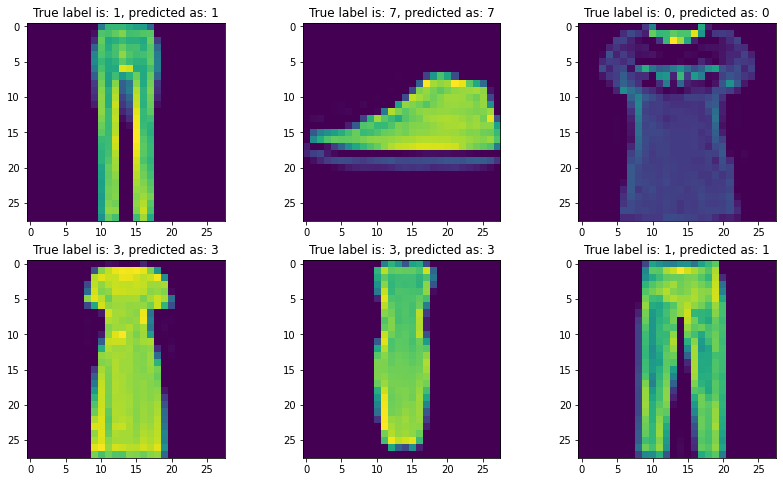

In [45]:
plt.figure(figsize=(14,8))
for i in range(examples_number):
    image = example[i].reshape(28,28)
    plt.subplot(2,3,i+1)
    plt.imshow(image)
    title = f"True label is: {true_labels[i]}, predicted as: {label[i]}"
    plt.title(title)

In [ ]:
pip install syft --user

  Using cached torchvision-0.9.1-cp38-cp38-win_amd64.whl (852 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import syft as sy

ModuleNotFoundError: ignored

In [ ]:
pip install syft==0.2.9 --user

  Using cached syft-0.2.9-py3-none-any.whl (433 kB)
     |████████████████████████████████| 57 kB 3.8 MB/s 
     |████████████████████████████████| 1.8 MB 19.5 MB/s 
     |████████████████████████████████| 484 kB 69.4 MB/s 
     |████████████████████████████████| 449 kB 70.9 MB/s 
     |████████████████████████████████| 753.4 MB 6.9 kB/s 
     |████████████████████████████████| 2.0 MB 8.1 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 79 kB 7.7 MB/s 
     |████████████████████████████████| 73 kB 2.1 MB/s 
     |████████████████████████████████| 9.0 MB 61.9 MB/s 
  Using cached tblib-1.6.0-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 200 kB 72.0 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 126 kB 48.4 MB/s 
     |████████████████████████████████| 4.0 MB 54.0 MB/s 
     |████████████████████████████████| 66 kB 4.0 MB/s 
     |██████████████████████████

In [ ]:
import torch as th
import numpy as np
from torchvision import datasets, transforms
import torchvision.datasets as datasets
from torch.utils.data import Subset
from torch import nn
import torch.nn.functional as F
from torch import optim
import syft as sy
import helper

In [ ]:
hook = sy.TorchHook(th)

In [ ]:

#Method to create 10 virtual workers and move to a list of workers
def create_workers():
  workers = []
  WORKER1 = sy.VirtualWorker(hook, id = "WORKER1")
  workers.append(WORKER1)
  WORKER2 = sy.VirtualWorker(hook, id = "WORKER2")
  workers.append(WORKER2)
  WORKER3 = sy.VirtualWorker(hook, id = "WORKER3")
  workers.append(WORKER3)
  WORKER4 = sy.VirtualWorker(hook, id = "WORKER4")
  workers.append(WORKER4)
  
  return workers

In [ ]:

#Method to clear out every tensor stored in the list of virtual workers
def clear_workers(workers):
  for worker in workers:
    worker.clear_objects()

In [ ]:

#Method to split the mnist test dataset into the various workers and also to load the mnist test dataset into a test loader
def create_federated_and_test_loaders(workers, trainset, testset):
  federated_train_loader = sy.FederatedDataLoader(trainset.federate(workers), batch_size=32, shuffle=True)

  test_loader = th.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
  return federated_train_loader, test_loader

In [ ]:
#Method to bind remote optimizer functions to the Initial states of the remote models 
def create_models(workers, lr):
  remoteModels = list()
  remoteOptimizers = list()
  for worker in workers:
    model = classifier()
    model = model.send(worker)
    remoteOptimizers.append(optim.SGD(model.parameters(), lr))
    remoteModels.append(model)
  return remoteModels, remoteOptimizers

In [ ]:
#Method to train models on the virtual workers without moving any gradients to the central model until the gradients have been collated.
def create_train_federated_models(workers, loader, lr = 0.12, epoch = 5):
  #sends model to first virtual worker
  virtual_models, virtual_optimizers = create_models(workers, lr)
#   virtual_model = classifier().send(workers[0])
#   optimizer = optim.SGD(virtual_model.parameters(), lr)
  criterion = nn.NLLLoss()
  for n in range(epoch):
    
    #Integer to keep up with first index.
    i = 0
    
    #Integer to keep up with current worker while training
    j = 0
    
    #Integer to count number of mini-batches per worker
    n_mbatch = 0
    
    #Variable to keep up with current worker while looping
    dbLoc = None
    
    #Variable to store cummulative loss.
    cum_loss = 0
    
    
    for batch_idx, (imgs, labels) in enumerate(loader):
      
      #condition to set dbLoc to the first worker
      if i == 0:
        i = 2
        dbLoc = imgs.location
        
      #condition to change dbLoc if img is stored on a different worker and also calculate loss
      if dbLoc is not imgs.location:
        print("The total loss for {0} for epoch {2} is {1}".format(workers[j].id, cum_loss / n_mbatch, n+1))
        dbLoc = imgs.location
        j += 1
        
        #Moving the model to a new worker
#         virtual_model.move(dbLoc)
        
        #Resetting the cummulative loss and batch count to zero for new worker
        cum_loss = 0
        n_mbatch = 0

      virtual_optimizers[j].zero_grad()
      output = virtual_models[j].forward(imgs)
      loss = criterion(output, labels)
      loss.backward()
      virtual_optimizers[j].step()
      cum_loss +=  loss.get().item()
      n_mbatch += 1
    print("The total loss for {0} is {1}".format(workers[j].id, cum_loss / n_mbatch))
  return virtual_models

In [ ]:
#Method to return the model to the central machine
def create_central_model(model):
  return model.get()

In [ ]:

#Method to convert the gradients of the remote models to their integar representation, encrypt and distribute among the provided workers
def share_gradients(models, workers):
  for model in models:
    model.fc1.weight.data = model.fc1.weight.data.fix_prec().share(*workers)
    model.fc1.bias.data = model.fc1.bias.data.fix_prec().share(*workers)
    model.fc2.weight.data = model.fc2.weight.data.fix_prec().share(*workers)
    model.fc2.bias.data = model.fc2.bias.data.fix_prec().share(*workers)
    model.fc3.weight.data = model.fc3.weight.data.fix_prec().share(*workers)
    model.fc3.bias.data = model.fc3.bias.data.fix_prec().share(*workers)
    model.fc4.weight.data = model.fc4.weight.data.fix_prec().share(*workers)
    model.fc4.bias.data = model.fc4.bias.data.fix_prec().share(*workers)
    model.fc5.weight.data = model.fc5.weight.data.fix_prec().share(*workers)
    model.fc5.bias.data = model.fc5.bias.data.fix_prec().share(*workers)   
  return models

In [ ]:
#Method to aggregate the gradients accross the shared devices and return the parameters
def aggregate_grads(models):
  fc1_weight = list()
  fc1_bias = list()
  fc2_weight = list()
  fc2_bias = list()
  fc3_weight = list()
  fc3_bias = list()
  fc4_weight = list()
  fc4_bias = list()
  fc5_weight = list()
  fc5_bias = list()
  for model in models:
    fc1_weight.append(model.fc1.weight.data.clone().get())
    fc1_bias.append(model.fc1.bias.data.clone().get())
    fc2_weight.append(model.fc2.weight.data.clone().get())
    fc2_bias.append(model.fc2.bias.data.clone().get())
    fc3_weight.append(model.fc3.weight.data.clone().get())
    fc3_bias.append(model.fc3.bias.data.clone().get())
    fc4_weight.append(model.fc4.weight.data.clone().get())
    fc4_bias.append(model.fc4.bias.data.clone().get())
    fc5_weight.append(model.fc5.weight.data.clone().get())
    fc5_bias.append(model.fc5.bias.data.clone().get())
  params = {}
  params["fc1.weight"] = (sum(fc1_weight) / len(fc1_weight)).get().float_prec()
  params["fc1.bias"] = (sum(fc1_bias) / len(fc1_bias)).get().float_prec()
  params["fc2.weight"] = (sum(fc2_weight) / len(fc2_weight)).get().float_prec()
  params["fc2.bias"] = (sum(fc2_bias) / len(fc2_bias)).get().float_prec()
  params["fc3.weight"] = (sum(fc3_weight) / len(fc3_weight)).get().float_prec()
  params["fc3.bias"] = (sum(fc3_bias) / len(fc3_bias)).get().float_prec()
  params["fc4.weight"] = (sum(fc4_weight) / len(fc4_weight)).get().float_prec()
  params["fc4.bias"] = (sum(fc4_bias) / len(fc4_bias)).get().float_prec()
  params["fc5.weight"] = (sum(fc5_weight) / len(fc5_weight)).get().float_prec()
  params["fc5.bias"] = (sum(fc5_bias) / len(fc5_bias)).get().float_prec()
  return params

In [ ]:

#Method to update the central model with the aggregated parameters from the remote models
def update_central_model(params):
  model = classifier()
  model.fc1.weight.data = params["fc1.weight"]
  model.fc1.bias.data = params["fc1.bias"]
  model.fc2.weight.data = params["fc2.weight"]
  model.fc2.bias.data = params["fc2.bias"]
  model.fc3.weight.data = params["fc3.weight"]
  model.fc3.bias.data = params["fc3.bias"]
  model.fc4.weight.data = params["fc4.weight"]
  model.fc4.bias.data = params["fc4.bias"]
  model.fc5.weight.data = params["fc5.weight"]
  model.fc5.bias.data = params["fc5.bias"]  
  return model

In [ ]:
#Classifier for creating the models
class classifier(nn.Module):
  def __init__(self):
    super().__init__() 
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 32)
    self.fc5 = nn.Linear(32, 10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.log_softmax(self.fc5(x), dim = 1)   
    return x

In [ ]:
# Application of transforms to normalize the mnist data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
fmnist_trainset = datasets.FashionMNIST('../fashion_data', train=True, download=True, transform=transform)
fmnist_testset = datasets.FashionMNIST('../fashion_data', train=False, download=True, transform=transform)

In [ ]:
workers = create_workers()
clear_workers(workers)

In [ ]:
workers

[<VirtualWorker id:WORKER1 #objects:0>,
 <VirtualWorker id:WORKER2 #objects:0>,
 <VirtualWorker id:WORKER3 #objects:0>,
 <VirtualWorker id:WORKER4 #objects:0>]

In [ ]:
federatedset, testset= create_federated_and_test_loaders(workers, fmnist_trainset, fmnist_testset)

In [ ]:
remoteModels = create_train_federated_models(workers, federatedset, lr = 0.12, epoch = 3)

The total loss for WORKER1 for epoch 1 is 1.0274843609155113
The total loss for WORKER2 for epoch 1 is 1.0931516173424751
The total loss for WORKER3 for epoch 1 is 1.071390764990341
The total loss for WORKER4 is 1.038315740411978
The total loss for WORKER1 for epoch 2 is 0.5777010698753126
The total loss for WORKER2 for epoch 2 is 0.595939646334028
The total loss for WORKER3 for epoch 2 is 0.5741811497633391
The total loss for WORKER4 is 0.5804882212234205
The total loss for WORKER1 for epoch 3 is 0.49270271306543717
The total loss for WORKER2 for epoch 3 is 0.5060869962421816
The total loss for WORKER3 for epoch 3 is 0.485176507391528
The total loss for WORKER4 is 0.5001787851169419


In [ ]:
remoteModels = share_gradients(remoteModels, workers[0:4])


In [ ]:
params  = aggregate_grads(remoteModels)


In [ ]:
remoteModels

[classifier(
   (fc1): Linear(in_features=784, out_features=256, bias=True)
   (fc2): Linear(in_features=256, out_features=128, bias=True)
   (fc3): Linear(in_features=128, out_features=64, bias=True)
   (fc4): Linear(in_features=64, out_features=32, bias=True)
   (fc5): Linear(in_features=32, out_features=10, bias=True)
 ), classifier(
   (fc1): Linear(in_features=784, out_features=256, bias=True)
   (fc2): Linear(in_features=256, out_features=128, bias=True)
   (fc3): Linear(in_features=128, out_features=64, bias=True)
   (fc4): Linear(in_features=64, out_features=32, bias=True)
   (fc5): Linear(in_features=32, out_features=10, bias=True)
 ), classifier(
   (fc1): Linear(in_features=784, out_features=256, bias=True)
   (fc2): Linear(in_features=256, out_features=128, bias=True)
   (fc3): Linear(in_features=128, out_features=64, bias=True)
   (fc4): Linear(in_features=64, out_features=32, bias=True)
   (fc5): Linear(in_features=32, out_features=10, bias=True)
 ), classifier(
   (fc1):

In [ ]:
params

{'fc1.bias': tensor([ 4.6117e+15, -1.9000e-02, -2.0000e-03,  4.6117e+15, -6.0000e-03,
         -7.0000e-03, -4.6117e+15, -1.3000e-02, -5.0000e-03,  4.6117e+15,
         -1.0000e-02,  4.6117e+15, -8.0000e-03,  4.6117e+15, -4.0000e-03,
         -1.0000e-02, -2.0000e-03, -1.1000e-02,  1.0000e-03,  4.6117e+15,
          0.0000e+00, -4.6117e+15, -4.6117e+15,  1.1000e-02,  5.0000e-03,
          4.6117e+15, -2.0000e-02,  4.6117e+15, -1.9000e-02, -4.0000e-03,
         -1.1000e-02, -2.0000e-03, -4.6117e+15,  4.6117e+15,  1.3000e-02,
          7.0000e-03,  4.6117e+15, -2.2000e-02,  4.6117e+15, -1.8000e-02,
         -1.3000e-02,  1.3000e-02, -1.1000e-02, -1.0000e-03, -3.0000e-03,
         -6.0000e-03, -4.6117e+15,  1.8000e-02,  4.6117e+15, -1.5000e-02,
         -1.2000e-02, -4.6117e+15,  0.0000e+00, -4.6117e+15,  4.6117e+15,
          4.6117e+15,  4.6117e+15, -1.0000e-02, -3.0000e-03,  4.6117e+15,
         -1.2000e-02,  4.6117e+15, -4.6117e+15, -4.6117e+15, -8.0000e-03,
         -1.3000e-02, -1.5

**ACCURACY MEASURES**

In [ ]:
model_0

{'bias': -0.0022203628946107093,
 'confusion_matrix': array([[0.91666667, 0.08333333],
        [0.5       , 0.5       ]]),
 'cost_history': [array([[111.59669607]]),
  array([[nan]]),
  array([[nan]]),
  array([[nan]]),
  array([[nan]]),
  array([[nan]]),
  array([[nan]]),
  array([[nan]]),
  array([[nan]]),
  array([[nan]]),
  array([[nan]]),
  array([[nan]]),
  array([[nan]]),
  array([[nan]])],
 'test_accuracy': 0.875,
 'train_accuracy': 0.95,
 'weights': array([[ 0.00000000e+00],
        [ 4.68750000e-04],
        [ 9.06250000e-04],
        [-2.81250000e-04],
        [-2.15625000e-03],
        [-4.03125000e-03],
        [-6.09375000e-03],
        [ 9.12500000e-02],
        [ 2.48906250e-01],
        [ 2.15694764e-01],
        [ 1.70021778e-01],
        [ 3.59374040e-03],
        [-2.40125008e-01],
        [-3.79937506e-01],
        [-3.60875005e-01],
        [-3.90437508e-01],
        [-7.10625060e-02],
        [ 5.30203660e-02],
        [-5.80563631e-03],
        [ 1.67000000e-01]

In [ ]:
print(model_0.predict(X_test[0:9]))
print(Y_test[0:9])

AttributeError: ignored

In [ ]:
model_0.score(X_train, Y_train)

In [ ]:
score = model_0.score(X_test, Y_test) # test score
score

0.675

In [35]:
from sklearn import metrics

In [36]:
from sklearn.linear_model import LogisticRegression
model_0 = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                         )
model_0

LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [37]:
model_0.fit(X_train, Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 51 epochs took 1 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    1.0s finished


LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [ ]:
predictions = model_0.predict(X_test)

cm = metrics.confusion_matrix(y_true=Y_test, 
                         y_pred = predictions, 
                        labels = model_0.classes_)

In [ ]:
cm

array([[3, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 7, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 4, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 2, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 3],
       [3, 0, 1, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4]])

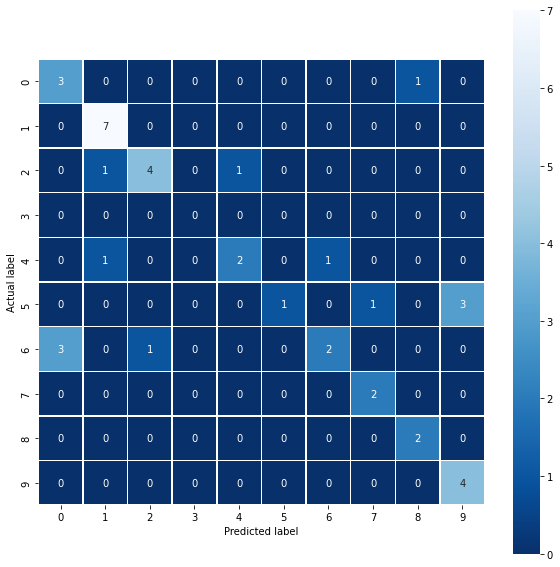

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)

In [ ]:
 accuracy = metrics.accuracy_score(Y_test, predictions)
 accuracy 

0.675

In [ ]:
print(metrics.classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.50      0.75      0.60         4
         1.0       0.78      1.00      0.88         7
         2.0       0.80      0.67      0.73         6
         4.0       0.67      0.50      0.57         4
         5.0       1.00      0.20      0.33         5
         6.0       0.67      0.33      0.44         6
         7.0       0.67      1.00      0.80         2
         8.0       0.67      1.00      0.80         2
         9.0       0.57      1.00      0.73         4

    accuracy                           0.68        40
   macro avg       0.70      0.72      0.65        40
weighted avg       0.72      0.68      0.64        40



In [ ]:
sns.set_style('darkgrid')
preds_train = model_0.predict(X_train)
# calculate prediction probability
prob_train = np.squeeze(model_0.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(model_0.predict_proba(X_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y, prob_train)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

ValueError: ignored

In [ ]:
 # creating index
 i = np.arange(len(tpr1))
 # extracting roc values against different thresholds 
 roc = pd.DataFrame({'fpr':fpr1, 'tpr':tpr1, 'tf':(tpr1-1+fpr1), 'thresholds':thresholds1}, index=i)
 # top 5 best roc occurrences 
 roc.iloc[(roc.tf-0).abs().argsort()[:5]] 

NameError: ignored

In [ ]:
 pre, rec, thr = metrics.precision_recall_curve(Y_test, prob_test)
 plt.figure(figsize=(8,4))
 plt.plot(thr, pre[:-1], label='precision')
 plt.plot(thr, rec[1:], label='recall')
 plt.xlabel('Threshold')
 plt.title('Precision & Recall vs Threshold', c='r', size=16)
 plt.legend()
 plt.show() 

In [ ]:
 fig, ax = plt.subplots(1,1, figsize=(8,8))
 metrics.plot_precision_recall_curve(model, X_test, Y_test, ax=ax) 

In [38]:
from sklearn.preprocessing import label_binarize
y = label_binarize(Y_train, classes=[0, 1, 2,3,4,5,6,7,8,9])


In [39]:
n_classes = y.shape[1]

In [41]:
random_state = np.random.RandomState(0)
n_samples, n_features = X_train.shape
X = np.c_[X_train, random_state.randn(n_samples, 200 * n_features)]

'''
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                         )
model1


y_score = model1.fit(X_train, y_train)
'''

random_state = np.random.RandomState(0)
n_samples, n_features = X_train.shape
X = np.c_[X_train, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

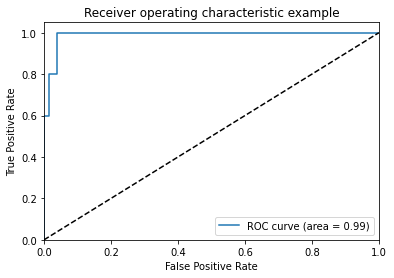

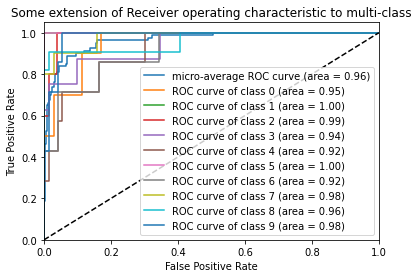

In [42]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()